<a href="https://colab.research.google.com/github/guilefoylegaurav/Telco-Customer-Churn-Prediction/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing the dataset

In [ ]:
df = pd.read_csv('drive/MyDrive/Datasets/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Some Feature Engineering

Removing unnecessary features

In [ ]:
df = df.drop(columns=['customerID'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Impute null values

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Insights


In [ ]:
def plot_histogram(feature):
  loyal_people = df[df['Churn'] == 'No'][feature]
  disloyal_people =df[df['Churn'] == 'Yes'][feature]
  plt.hist([loyal_people, disloyal_people], color = ["blue", "red"], label = ["Loyal", "Churn"] )
  plt.legend()
  plt.xlabel(feature)
  plt.ylabel("Individuals")
  plt.title(feature)

Tenure

Insight: 1) Most people who have been using the service since a long time are loyal 2) More than half of all the quitters quit within the first decade

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


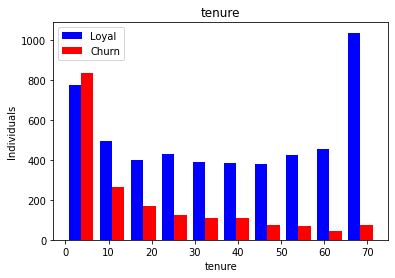

In [ ]:
plot_histogram("tenure")


In [ ]:
early_quitters = df[df["Churn"] == "Yes"][df["tenure"] <= 10]["tenure"].size
total = df[ df["Churn"] == 'Yes']["tenure"].size
print(f"{(early_quitters/total)*100} % quit within the first decade" )

51.79240235420011 % quit within the first decade


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Monthly charges



1.   Most customers having cheap plans are loyal 




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


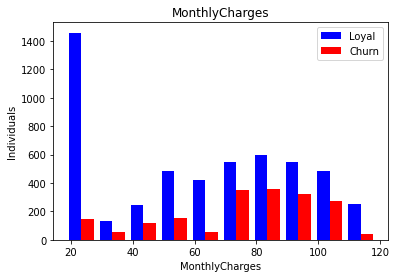

In [ ]:
plot_histogram("MonthlyCharges")





Partner vs Single (Single people are more likely to quit using the service)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


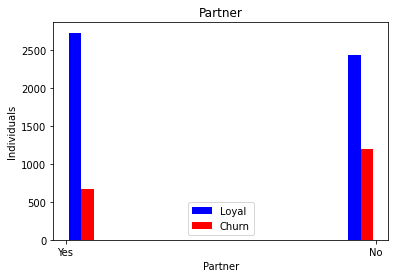

In [ ]:
plot_histogram("Partner")

Encoding

Unique values

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
df['gender'].replace({"Female":0, "Male":1}, inplace = True)
df['Partner'].replace({"No":0, "Yes":1}, inplace = True)
df["Dependents"].replace({"No":0, "Yes":1}, inplace = True)
df["PhoneService"].replace({"No":0, "Yes":1}, inplace = True)



In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' 

In [ ]:

df["OnlineSecurity"].replace({'No internet service':'No'}, inplace = True)
df["OnlineBackup"].replace({'No internet service':'No'}, inplace = True)
df["DeviceProtection"].replace({'No internet service':'No'}, inplace = True)
df["TechSupport"].replace({'No internet service':'No'}, inplace = True)
df["StreamingTV"].replace({'No internet service':'No'}, inplace = True)
df["StreamingMovies"].replace({'No internet service':'No'}, inplace = True)
df["MultipleLines"].replace({'No phone service':'No'}, inplace = True)



In [ ]:
df["MultipleLines"].replace({"No":0, "Yes":1}, inplace = True)
df["OnlineSecurity"].replace({"No":0, "Yes":1}, inplace = True)
df["OnlineBackup"].replace({"No":0, "Yes":1}, inplace = True)
df["DeviceProtection"].replace({"No":0, "Yes":1}, inplace = True)
df["TechSupport"].replace({"No":0, "Yes":1}, inplace = True)
df["StreamingTV"].replace({"No":0, "Yes":1}, inplace = True)
df["StreamingMovies"].replace({"No":0, "Yes":1}, inplace = True)
df["Churn"].replace({"No":0, "Yes":1}, inplace = True)
df["PaperlessBilling"].replace({"No":0, "Yes":1}, inplace = True)


In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


In [ ]:
df.replace({"Bank transfer (automatic)": "Bank transfer", "Credit card (automatic)": "Credit card", "Month-to-month": "M2M"}, inplace = True)

In [ ]:
df2 = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

Consistent and appropriate data types

In [ ]:
df3 = df2[df2["TotalCharges"] != " "]

In [ ]:
df3["TotalCharges"] = pd.to_numeric(df3["TotalCharges"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.dtypes

gender                              int64
SeniorCitizen                       int64
Partner                             int64
Dependents                          int64
tenure                              int64
PhoneService                        int64
MultipleLines                       int64
OnlineSecurity                      int64
OnlineBackup                        int64
DeviceProtection                    int64
TechSupport                         int64
StreamingTV                         int64
StreamingMovies                     int64
PaperlessBilling                    int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
InternetService_DSL                 uint8
InternetService_Fiber optic         uint8
InternetService_No                  uint8
Contract_M2M                        uint8
Contract_One year                   uint8
Contract_Two year                   uint8
PaymentMethod_Bank transfer       

Feature scaling

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Train Test Split

In [ ]:
X = df3.drop(columns = ["Churn"])
y = df3['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(26,), activation='relu'),
   
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4967 - accuracy: 0.7559
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8065
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8069
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8101
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4104 - accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 943us/step - loss: 0.5050 - accuracy: 0.7726


[0.5049885511398315, 0.7725657224655151]

In [ ]:
y_probs  = model.predict(X_test)

In [ ]:
y_predict = []
for data in  y_probs:
  if data > 0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)
    


In [ ]:
y_predict[:11]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
y_test[:11].values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

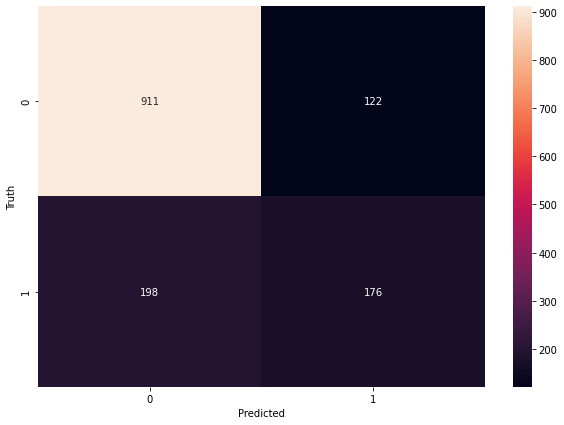

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, 
                              
                              predictions=y_predict
                              )

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')